In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from tensorflow.keras.layers import Dropout,Bidirectional,LSTM
from sklearn.metrics import mean_absolute_error, max_error, mean_squared_error,mean_absolute_percentage_error
%matplotlib inline

In [ ]:
file_path_train = "London.csv"

In [ ]:
train_data = pd.read_csv(file_path_train)

In [ ]:
train_data.head()

,Unnamed: 0,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
0,0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL
3,3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP
4,4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL


# Feature Engeneering

In [ ]:
train_data['Price'] = train_data['Price']

1) Null Values

In [ ]:
train_data.isnull().sum()

Unnamed: 0             0
Property Name          0
Price                  0
House Type             0
Area in sq ft          0
No. of Bedrooms        0
No. of Bathrooms       0
No. of Receptions      0
Location             962
City/County            0
Postal Code            0
dtype: int64

2) Price Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


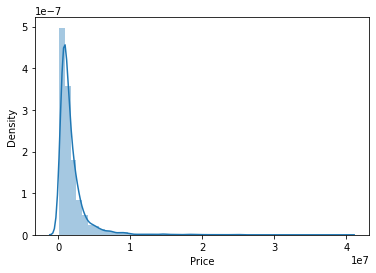

In [ ]:
sns.distplot(train_data['Price'])

In [ ]:
train_data['Price'].value_counts()

1250000    59
650000     54
550000     54
850000     52
1100000    49
           ..
1065000     1
3395000     1
1180000     1
2399500     1
8650000     1
Name: Price, Length: 536, dtype: int64

In [ ]:
len(train_data)*(0.03)

104.39999999999999

In [ ]:
# Remove the price outliers
train_data = train_data.sort_values('Price',ascending=False).iloc[884:] 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


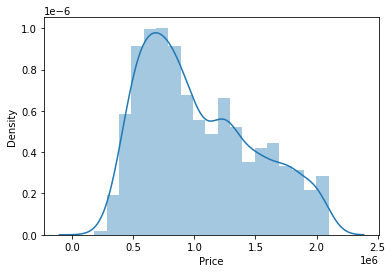

In [ ]:
sns.distplot(train_data['Price'])

In [ ]:
train_data = train_data.drop(['Unnamed: 0','Property Name','Location','Postal Code'], axis=1)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2596 entries, 1464 to 347
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Price              2596 non-null   int64 
 1   House Type         2596 non-null   object
 2   Area in sq ft      2596 non-null   int64 
 3   No. of Bedrooms    2596 non-null   int64 
 4   No. of Bathrooms   2596 non-null   int64 
 5   No. of Receptions  2596 non-null   int64 
 6   City/County        2596 non-null   object
dtypes: int64(5), object(2)
memory usage: 162.2+ KB


In [ ]:
le = LabelEncoder()

train_data['House Type'] = le.fit_transform(train_data['House Type'])
train_data['City/County'] = le.fit_transform(train_data['City/County'])

7) Data Correlation

In [ ]:
train_data.corr()['Price']

Price                1.000000
House Type           0.139682
Area in sq ft        0.709016
No. of Bedrooms      0.638643
No. of Bathrooms     0.638643
No. of Receptions    0.638643
City/County          0.091683
Name: Price, dtype: float64

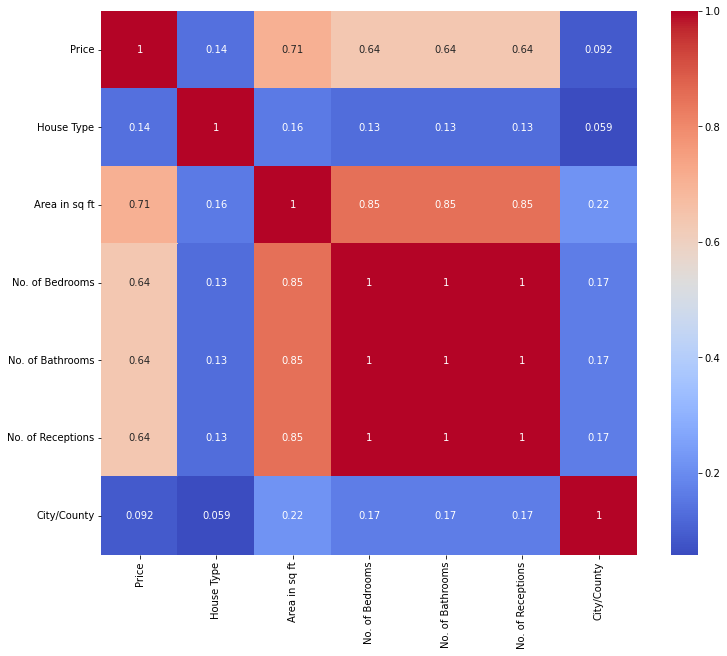

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')

# Processing the Data

In [ ]:
train_data.head()

,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,City/County
1464,2100000,3,2565,5,5,5,30
1478,2100000,5,2132,4,4,4,46
1583,2100000,2,1527,3,3,3,30
611,2100000,3,2137,5,5,5,30
857,2100000,3,1959,5,5,5,30


# Train Test Split

In [ ]:
X_train = train_data.drop('Price',axis=1).values
Y_train = train_data['Price'].values

X_train, X_test, Y_train, Y_test = train_test_split(X_train,Y_train,test_size=0.2,random_state=42)

# Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(2076, 6)

In [ ]:
X_test.shape

(520, 6)

# Creating a Model

# ANN

In [ ]:
model_price = Sequential()

model_price.add(Dense(128,activation='relu',input_shape=(6,)))
model_price.add(Dropout(0.5))
model_price.add(Dense(64,activation='relu'))
model_price.add(Dropout(0.5))
model_price.add(Dense(32,activation='relu'))
model_price.add(Dropout(0.5))
model_price.add(Dense(16,activation='relu'))
model_price.add(Dropout(0.5))
model_price.add(Dense(1, activation = 'linear'))

model_price.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
cb = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

# Training The Model

In [ ]:
model_price.fit(x=X_train,y=Y_train, validation_data=(X_test, Y_test), batch_size=128, epochs=100, callbacks=[cb])

Epoch 1/100
17/17 [==============================] - 1s 12ms/step - loss: 1281063780352.0000 - val_loss: 1273699893248.0000
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 1281061552128.0000 - val_loss: 1273695830016.0000
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 1281053294592.0000 - val_loss: 1273680101376.0000
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 1281021968384.0000 - val_loss: 1273623478272.0000
Epoch 5/100
17/17 [==============================] - 0s 6ms/step - loss: 1280919863296.0000 - val_loss: 1273445482496.0000
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 1280608436224.0000 - val_loss: 1272964186112.0000
Epoch 7/100
17/17 [==============================] - 0s 6ms/step - loss: 1279852937216.0000 - val_loss: 1271806689280.0000
Epoch 8/100
17/17 [==============================] - 0s 5ms/step - loss: 1278117937152.0000 - val_loss: 1269272543232.0000
Epoch 9/100
17/

#ANN

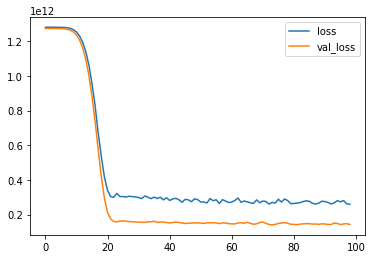

In [ ]:
losses = pd.DataFrame(model_price.history.history)
losses.plot()

# Test and Evaluate the Model

In [ ]:
y_pred = model_price.predict(X_test).reshape(X_test.shape[0])

# Create a dataframe to put the two columns of the true value and the prediction
pred_df = pd.DataFrame({'Actual value':Y_test, 'Predicted value':np.round_(y_pred, -3)})
print(pred_df.head(20))

    Actual value  Predicted value
0        1800000        1435000.0
1         595000         548000.0
2         735000         712000.0
3         465000         539000.0
4         775000         962000.0
5        1250000        1132000.0
6        1050000         702000.0
7         395000         657000.0
8        1250000         947000.0
9         899950        1232000.0
10       1500000         915000.0
11        900000         989000.0
12       1850000        1714000.0
13       2000000        1185000.0
14       2000000        1201000.0
15       1850000         954000.0
16        730000         795000.0
17        750000         710000.0
18        600000         791000.0
19        900000         895000.0


In [ ]:
res = mean_squared_error(y_true=pred_df['Actual value'], y_pred=pred_df['Predicted value'])

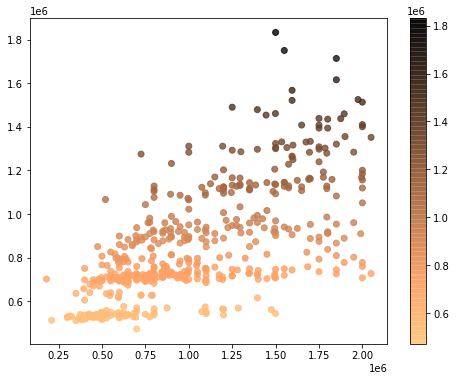

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize']=8,6
plt.scatter(Y_test,y_pred, c=y_pred, cmap = 'copper_r', alpha=.8)
plt.colorbar()

In [ ]:
mean_absolute_error(y_true=pred_df['Predicted value'], y_pred=pred_df['Actual value'])

282397.6615384615

In [ ]:
print(mean_squared_error(y_true=pred_df['Actual value'], y_pred=pred_df['Predicted value']))

151997230194.5346


In [ ]:
print(mean_absolute_percentage_error(y_true=pred_df['Actual value'], y_pred=pred_df['Predicted value']))

0.25955594084300626


In [ ]:
from sklearn.metrics import explained_variance_score
explained_variance_score(Y_test, y_pred)

0.4334332107589399

# BI LSTM

In [ ]:
import keras
import tensorflow
from tensorflow import keras

model_lstm  = keras.models.Sequential([
                                  keras.layers.LSTM(units=10,return_sequences=True,input_shape=[6,1]),
                                  keras.layers.LSTM(units=10,return_sequences=True, activation='relu'),
                                  keras.layers.Bidirectional(keras.layers.LSTM(units=10, return_sequences=True)),
                                  keras.layers.Bidirectional(keras.layers.LSTM(units=10, return_sequences=True)),
                                  keras.layers.Dense(units=128, activation='relu'),
                                  keras.layers.Dense(units=64, activation='relu'),
                                  keras.layers.TimeDistributed(keras.layers.Dense(1, activation='linear')),
                                  keras.layers.Flatten(),
                                  keras.layers.Dense(units=64, activation='relu'),
                                  keras.layers.Dense(1, activation='linear')
])

model_lstm.summary()
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
# fit network
history = model_lstm.fit(X_train, Y_train, epochs=100, batch_size=128, validation_data=(X_test, Y_test),verbose=2, shuffle=False)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 10)             480       
                                                                 
 lstm_1 (LSTM)               (None, 6, 10)             840       
                                                                 
 bidirectional (Bidirectiona  (None, 6, 20)            1680      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 6, 20)            2480      
 nal)                                                            
                                                                 
 dense_10 (Dense)            (None, 6, 128)            2688      
                                                                 
 dense_11 (Dense)            (None, 6, 64)            

#BI LSTM

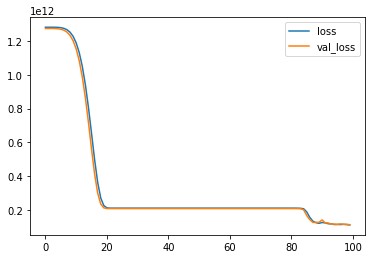

In [ ]:
losses = pd.DataFrame(model_lstm.history.history)
losses.plot()

In [ ]:
z_pred = model_lstm.predict(X_test)
z_pred = z_pred.reshape([X_test.shape[0]])
# Create a dataframe to put the two columns of the true value and the prediction
pred_df2 = pd.DataFrame({'Actual value':Y_test, 'Predicted value':np.round_(z_pred, -3)})
print(pred_df2.head(20))

    Actual value  Predicted value
0        1800000        1573000.0
1         595000         599000.0
2         735000         806000.0
3         465000         576000.0
4         775000        1145000.0
5        1250000        1445000.0
6        1050000         777000.0
7         395000         745000.0
8        1250000        1151000.0
9         899950        1471000.0
10       1500000        1138000.0
11        900000        1156000.0
12       1850000        1556000.0
13       2000000        1525000.0
14       2000000        1533000.0
15       1850000        1154000.0
16        730000         815000.0
17        750000         803000.0
18        600000         805000.0
19        900000        1105000.0


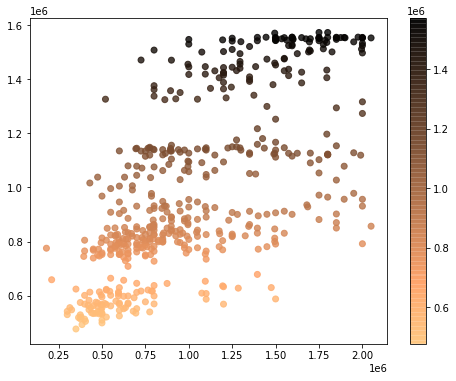

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize']=8,6
plt.scatter(Y_test,z_pred, c=z_pred, cmap = 'copper_r', alpha=.8)
plt.colorbar()

# RNN

In [ ]:
import keras
import tensorflow
from tensorflow import keras
model_rnn  = keras.models.Sequential([
                                  keras.layers.LSTM(units=10,return_sequences=True,input_shape=[6,1]),
                                  keras.layers.LSTM(units=10,return_sequences=True, activation='relu'),
                                  keras.layers.Dense(units=64, activation='relu'),
                                  keras.layers.TimeDistributed(keras.layers.Dense(1, activation='linear')),
                                  keras.layers.Flatten(),
                                  keras.layers.Dense(units=64, activation='relu'),
                                  keras.layers.Dense(units=32, activation='relu'),
                                  keras.layers.Dense(1, activation='linear')
])
model_rnn.summary()
model_rnn.compile(loss='mean_absolute_error', optimizer='adam')
# fit network
history = model_rnn.fit(X_train, Y_train, epochs=100, batch_size=128, validation_data=(X_test, Y_test),verbose=2, shuffle=False)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 6, 10)             480       
                                                                 
 lstm_5 (LSTM)               (None, 6, 10)             840       
                                                                 
 dense_15 (Dense)            (None, 6, 64)             704       
                                                                 
 time_distributed_1 (TimeDis  (None, 6, 1)             65        
 tributed)                                                       
                                                                 
 flatten_1 (Flatten)         (None, 6)                 0         
                                                                 
 dense_17 (Dense)            (None, 64)                448       
                                                      

#RNN

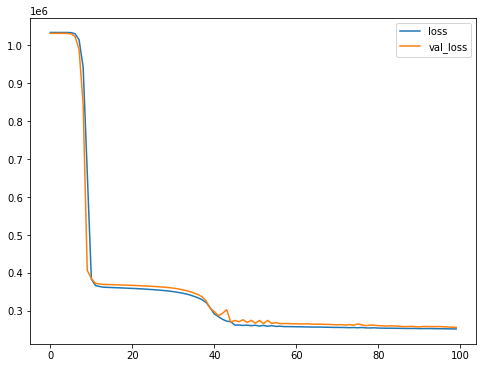

In [ ]:
losses = pd.DataFrame(model_rnn.history.history)
losses.plot()

In [ ]:
x_pred = model_rnn.predict(X_test)
x_pred = z_pred.reshape([X_test.shape[0]])
# Create a dataframe to put the two columns of the true value and the prediction
pred_df3 = pd.DataFrame({'Actual value':Y_test, 'Predicted value':np.round_(x_pred, -3)})
print(pred_df3.tail(20))

     Actual value  Predicted value
500       1500000        1553000.0
501       1495000        1571000.0
502        375000         514000.0
503       1385000        1447000.0
504       1350000        1052000.0
505       1550000         912000.0
506       1500000         906000.0
507       1535000        1550000.0
508       1850000        1027000.0
509       1595000        1528000.0
510        500000         535000.0
511        500000         968000.0
512        595000         613000.0
513       1850000        1548000.0
514       1175000        1406000.0
515       2000000        1317000.0
516       1300000        1138000.0
517       1000000         928000.0
518       2000000        1555000.0
519       1225000        1146000.0


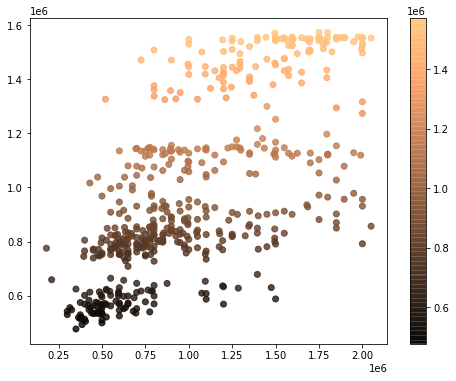

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize']=8,6
plt.scatter(Y_test,x_pred, c=x_pred, cmap = 'copper', alpha=.8)
plt.colorbar()